# Car Price Prediction

## Problem statement

What will be the price of this car?

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd 

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

## 2. Loading the dataset

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

## 3. Exploratory data analysis

In [3]:
# View the first five lines
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Our response label here is “price” which represents an answer to the regression question “what is the price of this car?”

In [4]:
df.shape

(205, 26)

In [5]:
# checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Interpreting Data Information**

- We have 205 rows
- We have 26 columns.
- There are numerical features that have data type `float64`.
- There are categorical features that have data type `object`.

No missing values

In [6]:
# Normalize the feature names
df['car_id'] = df['car_ID']
df['car_name'] = df['CarName']

In [7]:
# drop 
df = df.drop(['car_ID', 'CarName'], axis=1)

In [8]:
# statistical summary of numerical variables
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_id
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,103.000000
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,59.322565
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,1.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,52.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,103.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,154.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,205.000000


In [9]:
# summary statistics for categorical columns
df.describe(include=['object']).T

,count,unique,top,freq
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94
car_name,205,147,peugeot 504,6


In [10]:
# We compute the number of unique elements one columns at a time as it's faster
for column in df.columns:
    print(column, df[column].nunique())

symboling 6
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189
car_id 205
car_name 147


### Univariate Analysis

**Analyze the target variable**


In [11]:
df['price'].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [12]:
# number of unique values
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

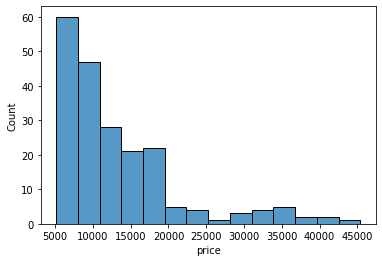

In [13]:
#histogram
sns.histplot(df['price']);

In [14]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 1.777678
Kurtosis: 3.051648


### Bivariate Analysis


In [15]:
df[["fueltype", "price"]]

,fueltype,price
0,gas,13495.0
1,gas,16500.0
2,gas,16500.0
3,gas,13950.0
4,gas,17450.0
...,...,...
200,gas,16845.0
201,gas,19045.0
202,gas,21485.0
203,diesel,22470.0


[]

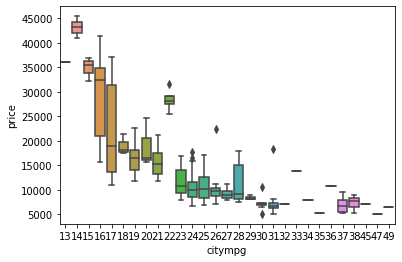

In [16]:
# boxplot
sns.boxplot(data=df,x="citympg",y="price")
plt.rcParams['figure.figsize']=(20,20)
plt.plot()

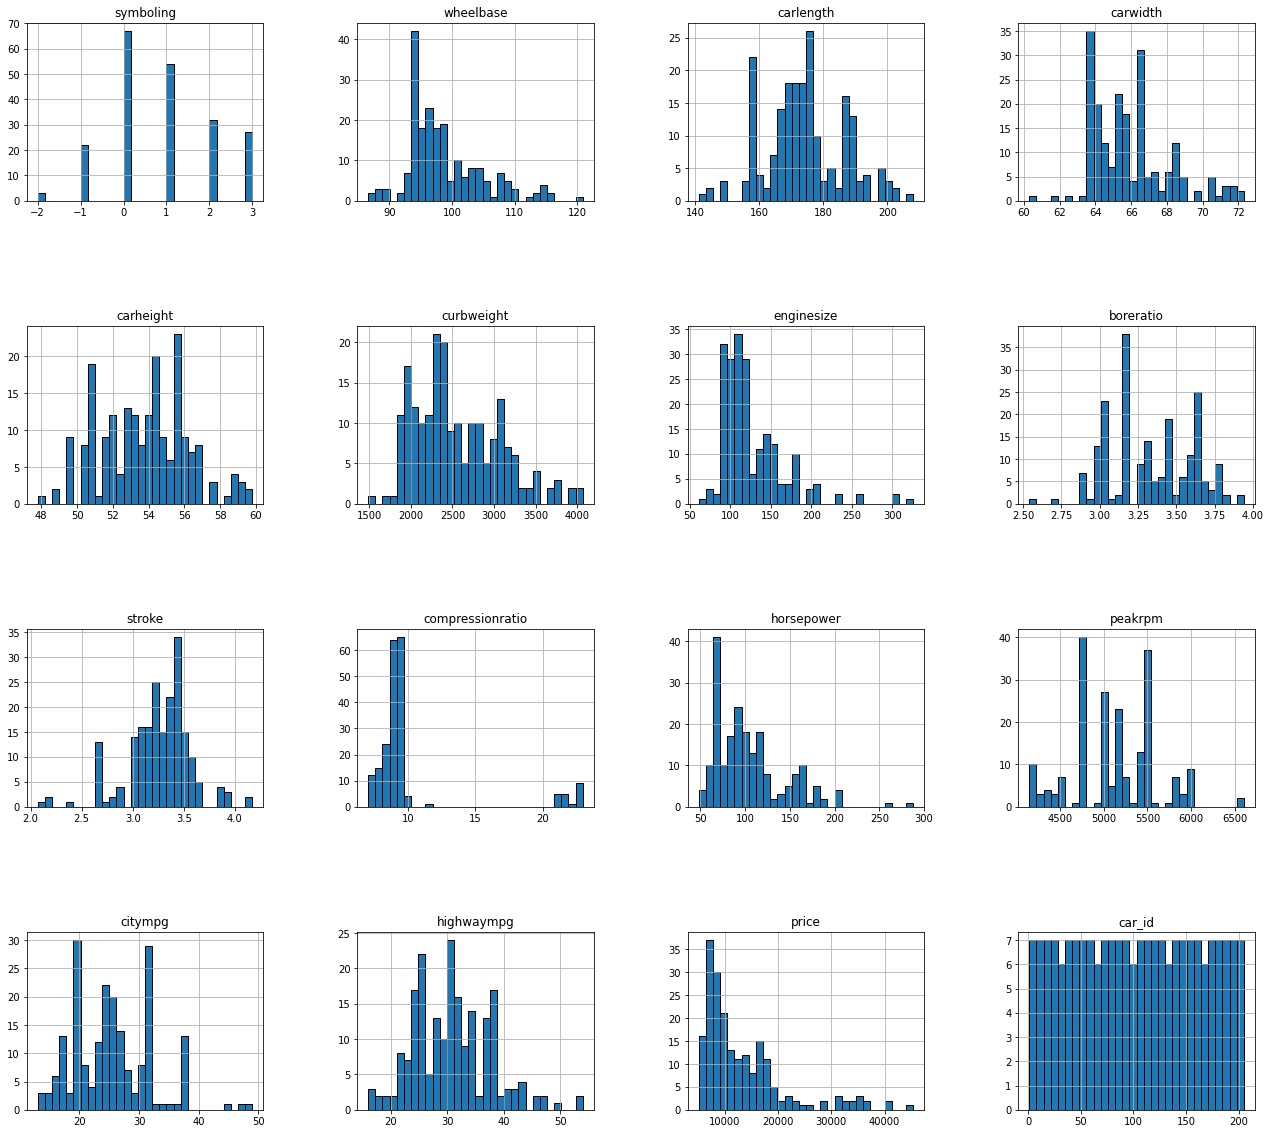

In [17]:
# distribution 
df.hist(figsize=(22, 20), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [18]:
# correlations
corr_matrix = df.corr()
corr_matrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_id
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.151621
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,0.129729
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.170636
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,0.052387
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,0.255960
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,0.071962
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.033930
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,0.260064
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.160824
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984,0.150276


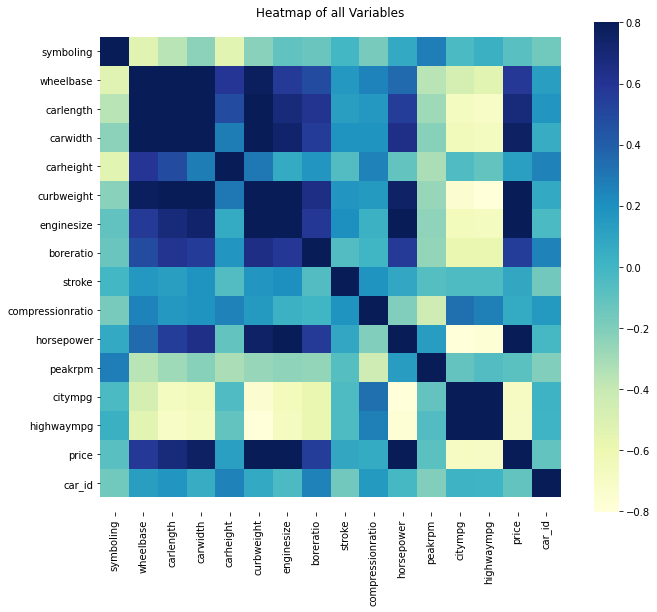

In [19]:
# check correlation matrix, darker means more correlation
fig, ax0 = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True, ax=ax0, cmap="YlGnBu")
# margins bug
b, t = plt.ylim()
plt.ylim(b + 0.5, t-0.5)
ax0.set_title("Heatmap of all Variables")
plt.show()

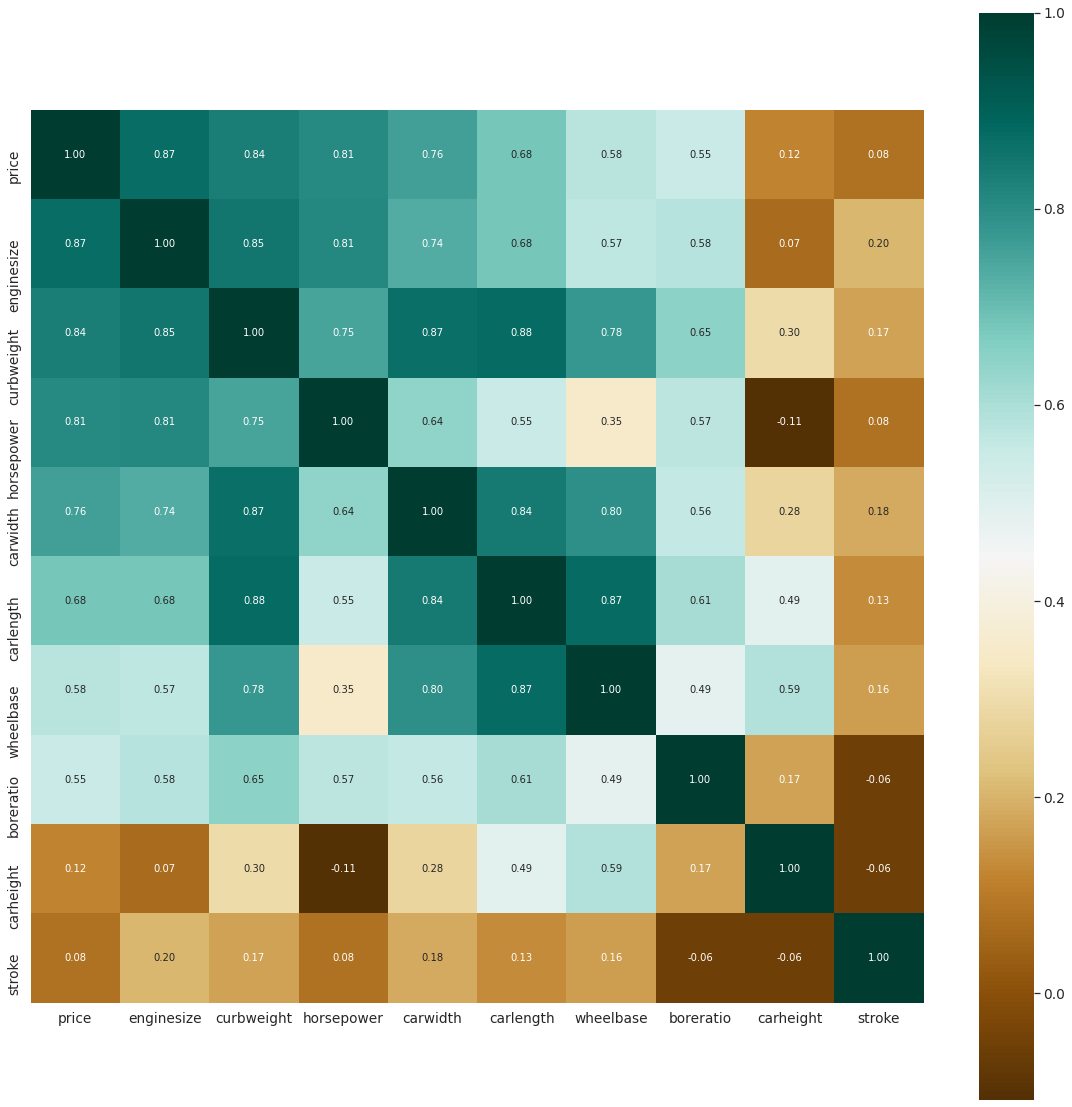

In [20]:
# price correlation matrix zoomed
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',  cmap="BrBG", annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [21]:
# order the correlations with SalePrice
correlations = corr_matrix["price"].sort_values()
correlations

highwaympg         -0.697599
citympg            -0.685751
car_id             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

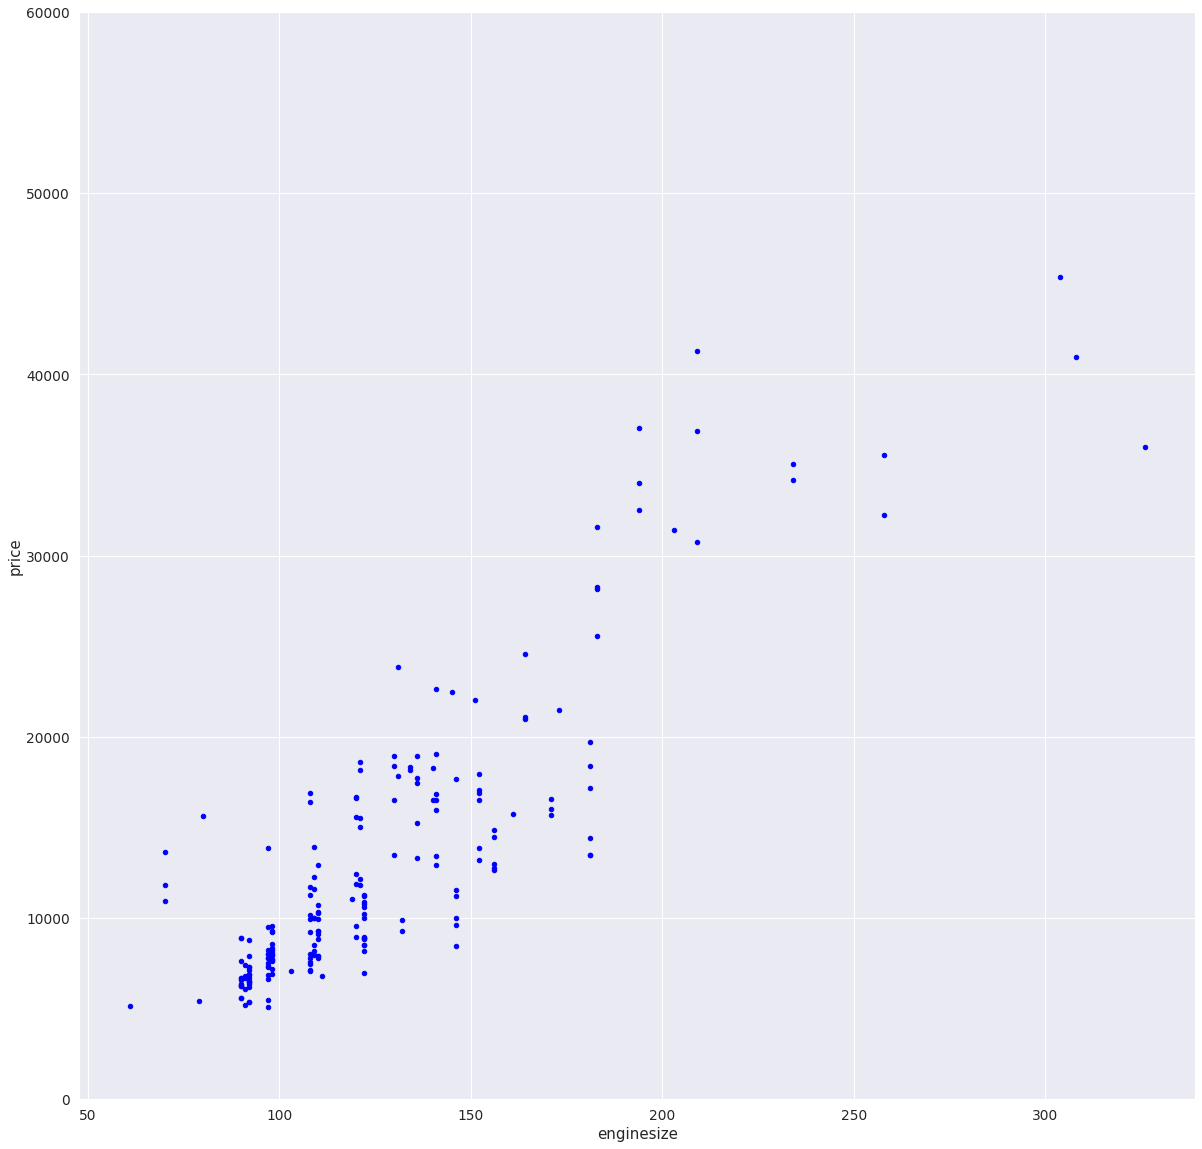

In [22]:
# Relationship with numerical variables
data = pd.concat([df['price'], df['enginesize']], axis=1)
data.plot.scatter(x='enginesize', y='price', ylim=(0,60000), color="blue");

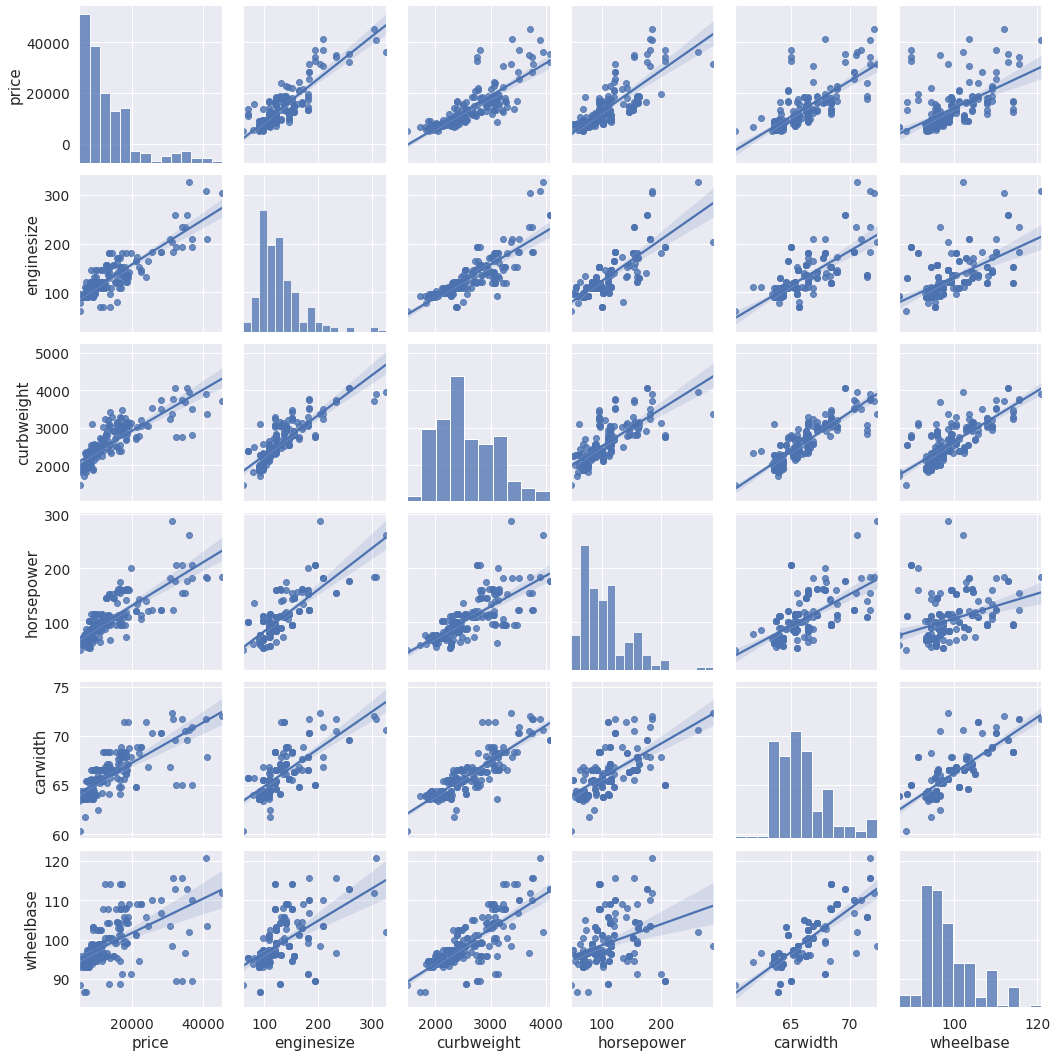

In [23]:
# linear relationship
cols = ["price", 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'wheelbase']

g = sns.pairplot(df[cols], kind = "reg")

plt.savefig("scatterplot_matrix.png") 

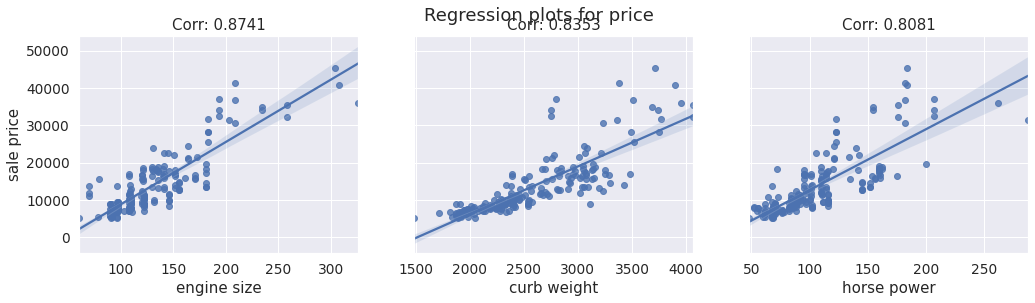

In [24]:
# Regression plots with good correlations

corr_enginesize = correlations['enginesize']
corr_curbweight = correlations['curbweight']
corr_horsepower = correlations['horsepower']

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols= 3, sharey = True, figsize=(17, 4))

s1 = sns.regplot(x = "enginesize", y = "price", data=df, ax=ax1)
s1.set_title("Corr: {:.4f}".format(corr_enginesize))
s1.set(xlabel="engine size", ylabel="sale price")

s2 = sns.regplot(x = "curbweight", y = "price", data=df, ax=ax2)
s2.set_title("Corr: {:.4f}".format(corr_curbweight))
s2.set(xlabel="curb weight", ylabel="")

s3 = sns.regplot(x = "horsepower", y = "price", data=df, ax=ax3)
s3.set_title("Corr: {:.4f}".format(corr_horsepower))
s3.set(xlabel="horse power", ylabel="")

fig.suptitle("Regression plots for price")
plt.show()

## 4. Feature engineering

In [25]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']  # the numeric types in Pandas

numerical_columns = df.select_dtypes(include=numeric_types).columns.tolist()

numerical_columns

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'car_id']

### Feature extraction

**Merge strong correlation features**

In [26]:
strong_correlations = [
'boreratio',          
'wheelbase',        
'carlength',          
'carwidth',        
'horsepower',       
'curbweight',        
'enginesize',          
'price']

df = df[strong_correlations]
df.head()

,boreratio,wheelbase,carlength,carwidth,horsepower,curbweight,enginesize,price
0,3.47,88.6,168.8,64.1,111,2548,130,13495.0
1,3.47,88.6,168.8,64.1,111,2548,130,16500.0
2,2.68,94.5,171.2,65.5,154,2823,152,16500.0
3,3.19,99.8,176.6,66.2,102,2337,109,13950.0
4,3.19,99.4,176.6,66.4,115,2824,136,17450.0


### Feature scaling

In [27]:
numerical_columns = strong_correlations
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
price,205.0,13276.710571,7988.852332,5118.00,7788.00,10295.00,16503.00,45400.00


In [28]:
from sklearn.preprocessing import MinMaxScaler

pd.DataFrame(  
    MinMaxScaler().fit_transform(df[numerical_columns]),
    columns=numerical_columns
).describe().T

,count,mean,std,min,25%,50%,75%,max
boreratio,205.0,0.564111,0.193460,0.0,0.435714,0.550000,0.742857,1.0
wheelbase,205.0,0.354419,0.175562,0.0,0.230321,0.303207,0.460641,1.0
carlength,205.0,0.491780,0.184139,0.0,0.376119,0.479104,0.626866,1.0
carwidth,205.0,0.467317,0.178767,0.0,0.316667,0.433333,0.550000,1.0
horsepower,205.0,0.233821,0.164767,0.0,0.091667,0.195833,0.283333,1.0
curbweight,205.0,0.414106,0.201971,0.0,0.254849,0.359193,0.561288,1.0
enginesize,205.0,0.248707,0.157142,0.0,0.135849,0.222642,0.301887,1.0
price,205.0,0.202540,0.198323,0.0,0.066283,0.128519,0.282632,1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   boreratio   205 non-null    float64
 1   wheelbase   205 non-null    float64
 2   carlength   205 non-null    float64
 3   carwidth    205 non-null    float64
 4   horsepower  205 non-null    int64  
 5   curbweight  205 non-null    int64  
 6   enginesize  205 non-null    int64  
 7   price       205 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 12.9 KB


## 5. Training models

- Linear regression

- Random forest

- SVM

- Gradient Boosting

 ### Baseline solution

In [31]:
# separate the features from the labels
X = df.drop(["price"], axis=1)
y = df["price"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1) # 60/40

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.5, random_state=1) # 20/20

**Import algorithms for regression**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [36]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [37]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

## 6. Evaluating models

**metrics:**

- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [40]:
lr_y_pred = lr_model.predict(X_val)
svr_y_pred = svr_model.predict(X_val)
rf_y_pred = rf_model.predict(X_val)
gb_y_pred = gb_model.predict(X_val)

In [41]:
print('MAPE:', mean_absolute_percentage_error(y_val, lr_y_pred))
print('MAPE:', mean_absolute_percentage_error(y_val, svr_y_pred))
print('MAPE:', mean_absolute_percentage_error(y_val, rf_y_pred))
print('MAPE:', mean_absolute_percentage_error(y_val, gb_y_pred))

MAPE: 0.19159037883176258
MAPE: 0.4369012095316284
MAPE: 0.14279005340484346
MAPE: 0.14078670483614733


In [42]:
print('MAE:', mean_absolute_error(y_val, lr_y_pred))
print('MAE:', mean_absolute_error(y_val, svr_y_pred))
print('MAE:', mean_absolute_error(y_val, rf_y_pred))
print('MAE:', mean_absolute_error(y_val, gb_y_pred))

MAE: 2748.718200975045
MAE: 6178.414253215618
MAE: 2159.221719677419
MAE: 1877.6735132096755


In [43]:
print('RMSE:', mean_squared_error(y_val, lr_y_pred, squared=False))
print('RMSE:', mean_squared_error(y_val, svr_y_pred, squared=False))
print('RMSE:', mean_squared_error(y_val, rf_y_pred, squared=False))
print('RMSE:', mean_squared_error(y_val, gb_y_pred, squared=False))

RMSE: 3940.3254430370994
RMSE: 9031.111287464879
RMSE: 3327.8819675715486
RMSE: 2676.2079850916225


## 8. Cross validation

In [44]:
# Let's try to improve the score of SVM
from sklearn.model_selection import GridSearchCV

In [45]:
# Grid search with an rbf kernel

print("SVM grid search with a radial basis function kernel")

# rbf, C=1, gamma=0.1
svm_1_01 = SVR(kernel='rbf', C=1, gamma=0.1)
svm_1_01.fit(X_train, y_train)
print("C=1, gamma=0.1", svm_1_01.score(X_val, y_val))

# rbf, C=1, gamma=1
svm_1_1 = SVR(kernel='rbf', C=1, gamma=1)
svm_1_1.fit(X_train, y_train)
print("C=1, gamma=1", svm_1_1.score(X_val, y_val))

# rbf, C=1, gamma=10
svm_1_10 = SVR(kernel='rbf', C=1, gamma=10)
svm_1_10.fit(X_train, y_train)
print("C=1, gamma=10", svm_1_10.score(X_val, y_val))

# rbf, C=10, gamma=0.1
svm_10_01 = SVR(kernel='rbf', C=10, gamma=0.1)
svm_10_01.fit(X_train, y_train)
print("C=10, gamma=0.1", svm_10_01.score(X_val, y_val))

# rbf, C=10, gamma=1
svm_10_1 = SVR(kernel='rbf', C=10, gamma=1)
svm_10_1.fit(X_train, y_train)
print("C=10, gamma=1", svm_10_1.score(X_val, y_val))

# rbf, C=10, gamma=10
svm_10_10 = SVR(kernel='rbf', C=10, gamma=10)
svm_10_10.fit(X_train, y_train)
print("C=10, gamma=10", svm_10_10.score(X_val, y_val))

SVM grid search with a radial basis function kernel
C=1, gamma=0.1 -0.059282506826469294
C=1, gamma=1 -0.059284086289491444
C=1, gamma=10 -0.05928411609205053
C=10, gamma=0.1 -0.059240862144677386
C=10, gamma=1 -0.059256647095803805
C=10, gamma=10 -0.05925694511507218


In [46]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }

svm = SVR()

svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)

svm_gs.fit(X_train, y_train)

mean_absolute_error(y_val, svm_gs.best_estimator_.predict(X_val))

6169.511186448833

In [47]:
svm_gs.cv_results_


{'mean_fit_time': array([0.01197305, 0.00488515, 0.00484896, 0.00494041, 0.00535769,
        0.00807557, 0.00481176, 0.00477757, 0.00488286, 0.00655766,
        0.00484138, 0.00479531, 0.0048377 , 0.00979867, 0.00501261,
        0.00493698, 0.00494285, 0.01116004, 0.00773129, 0.0066349 ,
        0.0048028 , 0.00483847, 0.00527339, 0.00488524, 0.00601311]),
 'std_fit_time': array([0.00776213, 0.00023336, 0.00026532, 0.00018597, 0.00050422,
        0.0065378 , 0.00021154, 0.0002934 , 0.00020883, 0.00338973,
        0.00020829, 0.0001707 , 0.0002645 , 0.0062532 , 0.00045135,
        0.00040358, 0.00019016, 0.00805061, 0.00557552, 0.00324697,
        0.00024489, 0.00019027, 0.00044472, 0.00030067, 0.00156639]),
 'mean_score_time': array([0.00339742, 0.00338068, 0.00339231, 0.00333533, 0.0072289 ,
        0.00338435, 0.00325885, 0.00325613, 0.00341148, 0.00339026,
        0.00329642, 0.00340705, 0.00567765, 0.00362248, 0.00341401,
        0.00321002, 0.00406513, 0.00316825, 0.00667319, 0.00

## 7. Testing the model

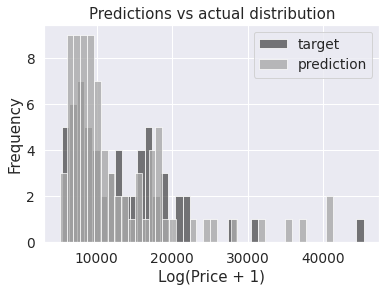

In [48]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_test, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

**Use the model**

In [49]:
car = X_test.iloc[10]
car_dict = car.to_dict()
car_dict

{'boreratio': 3.19,
 'wheelbase': 99.4,
 'carlength': 176.6,
 'carwidth': 66.4,
 'horsepower': 115.0,
 'curbweight': 2824.0,
 'enginesize': 136.0}

In [50]:
gb_model.predict([car])[0]

/home/assitan/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


14388.363876676627

In [51]:
y_test.iloc[10]

17450.0